# Heart Disease Diagnostic Analysis

# INDRODUCTION

Health is real wealth in the pandemic time we all realized the brute effects of covid-19 on
all irrespective of any status. You are required to analyze this health and medical data for
better future preparation.



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('whitegrid')

In [3]:
# Read the File for EDA
df = pd.read_csv("C:\\Users\\LENOVO\\Downloads\\recorrected_heart_disease_data.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,33,0,1,162,241,0,0,190,0,3.0,3,0,7,0
1,29,0,4,149,394,0,1,113,1,2.6,2,2,3,1
2,50,1,4,151,374,0,1,125,0,0.7,2,2,3,0
3,45,1,3,109,253,0,0,187,1,0.0,3,2,6,1
4,46,1,2,174,172,1,2,199,1,3.7,2,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,30,0,1,148,371,1,2,139,1,3.8,3,3,7,0
299,56,1,4,150,372,1,1,102,0,1.2,3,2,6,1
300,77,1,3,101,231,1,2,157,0,1.9,3,3,7,0
301,49,1,1,119,310,0,2,180,0,1.4,1,0,7,0


In [4]:
#Checking out the columns in the data set 
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

# Here are thirteen features in Dataset 

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or 

definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

num: Heart disease (0 = no, 1 = yes)

In [5]:
# Cheching of the null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There is no missing Value in the dataset.Otherwise we have to find the solution for the missing value.

In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
num           int64
dtype: object

In [7]:
# Finding out what is in the num column :
num= df.groupby('num').size()
num


num
0    164
1    139
dtype: int64

In [8]:
# Converting numerical data into categorical data 
def heart_Disease(row):
    if row==0 :
        return 'Absence'
    elif row==1 :
        return 'Presence'

In [9]:
df['Heart_Disease']=df['num'].apply(heart_Disease)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease
0,33,0,1,162,241,0,0,190,0,3.0,3,0,7,0,Absence
1,29,0,4,149,394,0,1,113,1,2.6,2,2,3,1,Presence
2,50,1,4,151,374,0,1,125,0,0.7,2,2,3,0,Absence
3,45,1,3,109,253,0,0,187,1,0.0,3,2,6,1,Presence
4,46,1,2,174,172,1,2,199,1,3.7,2,1,3,0,Absence


In [10]:
new_df=df.groupby('Heart_Disease')['num'].count()
new_df

Heart_Disease
Absence     164
Presence    139
Name: num, dtype: int64

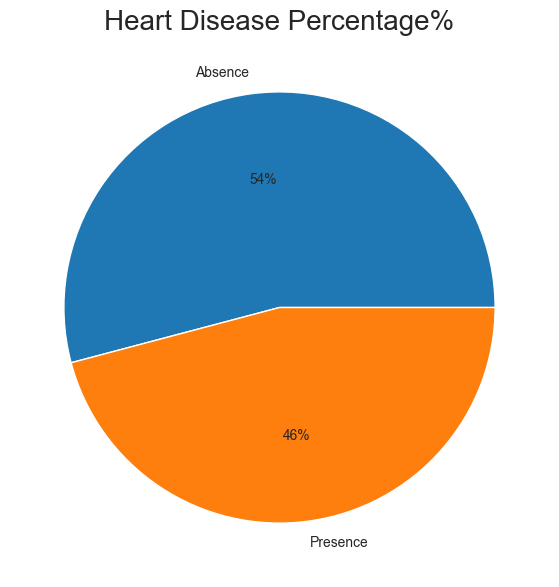

In [11]:
# Creating the Pie chart to know How many percentage of people having heart disease 
plt.figure(figsize=(10,7))
plt.pie(new_df,labels=['Absence','Presence'],autopct='%0.0f%%')
plt.title('Heart Disease Percentage%',fontsize=20)
plt.show()

In the overall individual population 54% for the people are suffering from  heart Disease and 46%  are not suffering for it .

In [12]:
# Statistical Analysis
Min_Age=df['age'].min()
Max_Age=df['age'].max()
Avg_Age=df['age'].mean()
print('Minimun Age =',Min_Age)
print('Maximum Age =',Max_Age)
print('Average Age =',Avg_Age)

Minimun Age = 29
Maximum Age = 77
Average Age = 54.00330033003301


In [13]:
# Catagorial Analysis 
Young_Ages =df[(df['age']>=29) & (df['age']<=40)]
Middle_Ages =df[(df['age']>=40) & (df['age']<=55)]
Elderly_Ages=df[(df['age']>=55)]
print("Young Ages =",len(Young_Ages))
print("Middle Ages =",len(Middle_Ages))
print("Elderly Ages =",len(Elderly_Ages))


Young Ages = 67
Middle Ages = 100
Elderly Ages = 149


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\1622410183.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Young_Ages','Middle Ages','Elderly Ages'],y=[len(Young_Ages),len(Middle_Ages),len(Elderly_Ages)],palette='YlGn_r')


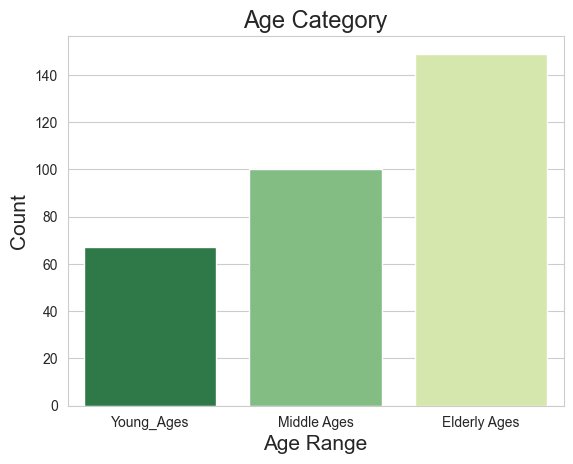

In [14]:
#Bar Plot Creation of Age Category :
sns.barplot(x=['Young_Ages','Middle Ages','Elderly Ages'],y=[len(Young_Ages),len(Middle_Ages),len(Elderly_Ages)],palette='YlGn_r')
plt.title('Age Category',fontsize=17)
plt.xlabel('Age Range',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

In [15]:
# Coverting numerical data into categorical data :
def gender(row):
    if row==1 :
        return 'Male'
    elif row==0 :
        return 'Female'


In [16]:
df['New_sex']=df['sex'].apply(gender)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,New_sex
0,33,0,1,162,241,0,0,190,0,3.0,3,0,7,0,Absence,Female
1,29,0,4,149,394,0,1,113,1,2.6,2,2,3,1,Presence,Female
2,50,1,4,151,374,0,1,125,0,0.7,2,2,3,0,Absence,Male
3,45,1,3,109,253,0,0,187,1,0.0,3,2,6,1,Presence,Male
4,46,1,2,174,172,1,2,199,1,3.7,2,1,3,0,Absence,Male


In [17]:
def Range(row):
    if row>=29 and row<=40 :
        return 'Young Age'
    elif row>=40 and row<=55 :
        return 'Middle Age'
    elif row>=55 :
        return 'Elder Age'
        

In [18]:
df['Age_Range']=df['age'].apply(Range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Heart_Disease,New_sex,Age_Range
0,33,0,1,162,241,0,0,190,0,3.0,3,0,7,0,Absence,Female,Young Age
1,29,0,4,149,394,0,1,113,1,2.6,2,2,3,1,Presence,Female,Young Age
2,50,1,4,151,374,0,1,125,0,0.7,2,2,3,0,Absence,Male,Middle Age
3,45,1,3,109,253,0,0,187,1,0.0,3,2,6,1,Presence,Male,Middle Age
4,46,1,2,174,172,1,2,199,1,3.7,2,1,3,0,Absence,Male,Middle Age


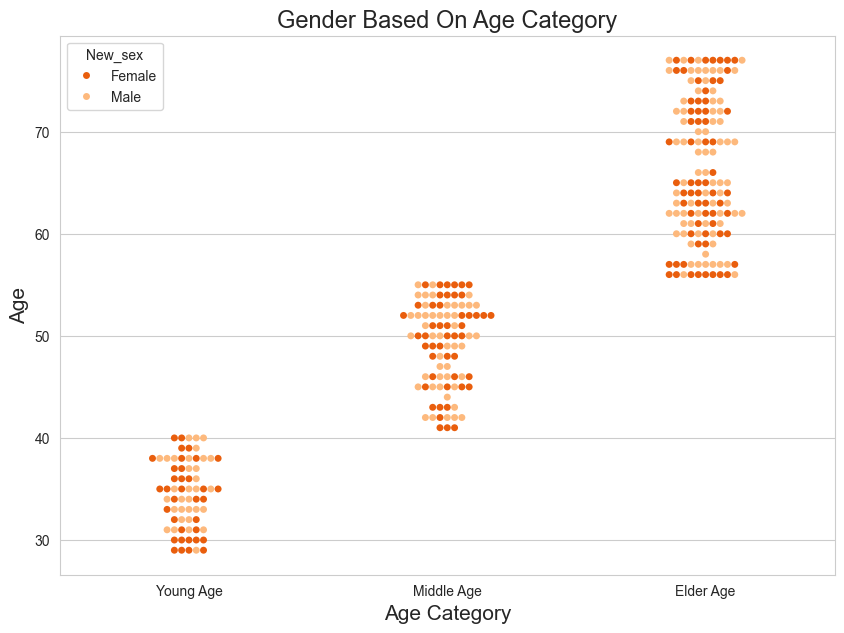

In [19]:
# Swarn plot gender based on  category 
plt.figure(figsize=(10,7))
sns.swarmplot(x='Age_Range',y='age',hue='New_sex',data=df,order=['Young Age','Middle Age','Elder Age'],palette='Oranges_r')
plt.title('Gender Based On Age Category',fontsize=17)
plt.xlabel('Age Category',fontsize=15)
plt.ylabel('Age',fontsize=15)
plt.show()

In our individual data , Most of the Male are from Middle Age category and More female from elder age category.

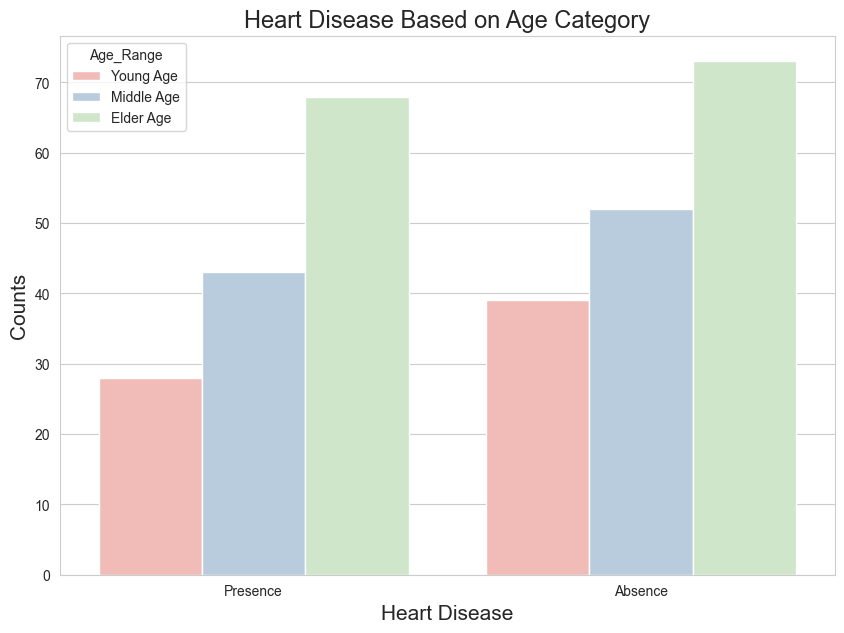

In [20]:
# Count Plot Based on Heart disease Based on Age Category 

plt.figure(figsize=(10,7))
hue_order=['Young Age','Middle Age','Elder Age']
sns.countplot(x='Heart_Disease',hue='Age_Range',data=df,order=['Presence','Absence'],hue_order=hue_order  ,palette='Pastel1')
plt.title('Heart Disease Based on Age Category',fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

Elder age people are mostly affected by the heart disease and middle age are mostlt free from any kind of Disease.

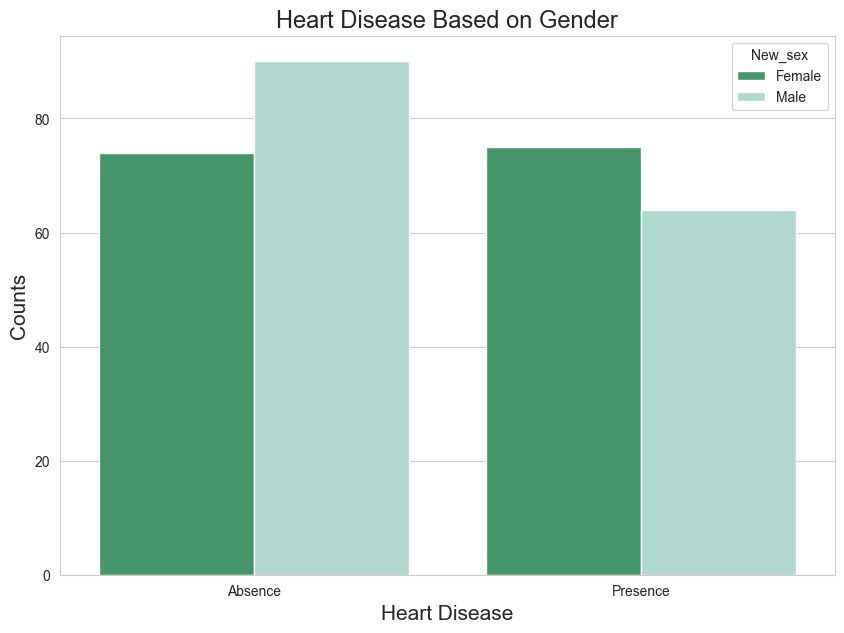

In [21]:
# Count plot heart disease based on gender 
plt.figure(figsize=(10,7))
sns.countplot(x='Heart_Disease',hue='New_sex',data=df,palette='BuGn_r')
plt.title('Heart Disease Based on Gender',fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.show()

Female are more prone to heart disease as compared to male .

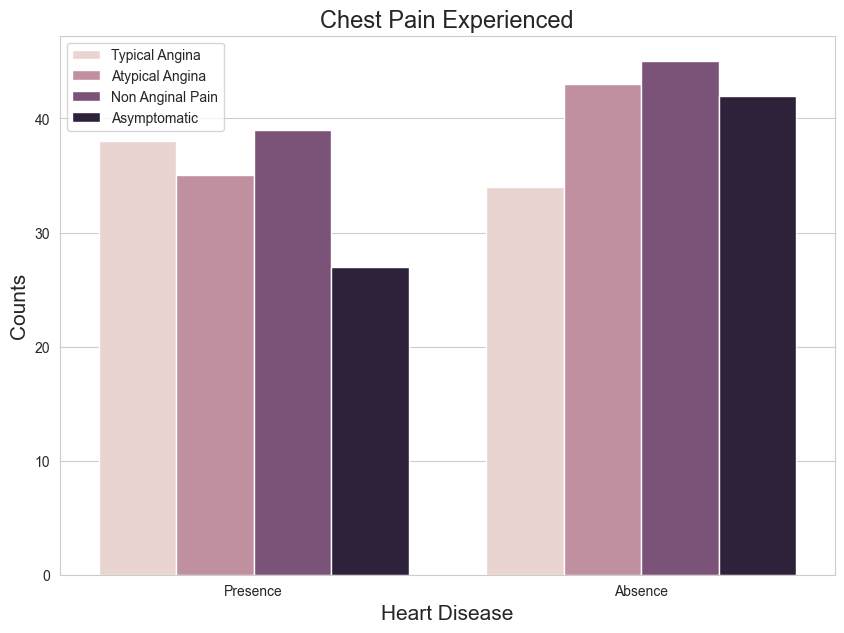

In [22]:
#Count plot of cheast pain experience 
plt.figure(figsize=(10,7))
sns.countplot(x='Heart_Disease',hue='cp',data=df,order=['Presence','Absence'])
plt.title('Chest Pain Experienced',fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.show()

its seems like people who are suffering from Non Anginal Pain have the higher chances of heart disease.
Non Anginal Chest pain that meets one or none of the characteristics of typical angina. This pain is often sharp, stabbing, or burning and can be caused by various non-cardiac issues, such as musculoskeletal problems, gastroesophageal reflux disease (GERD), or anxiety.

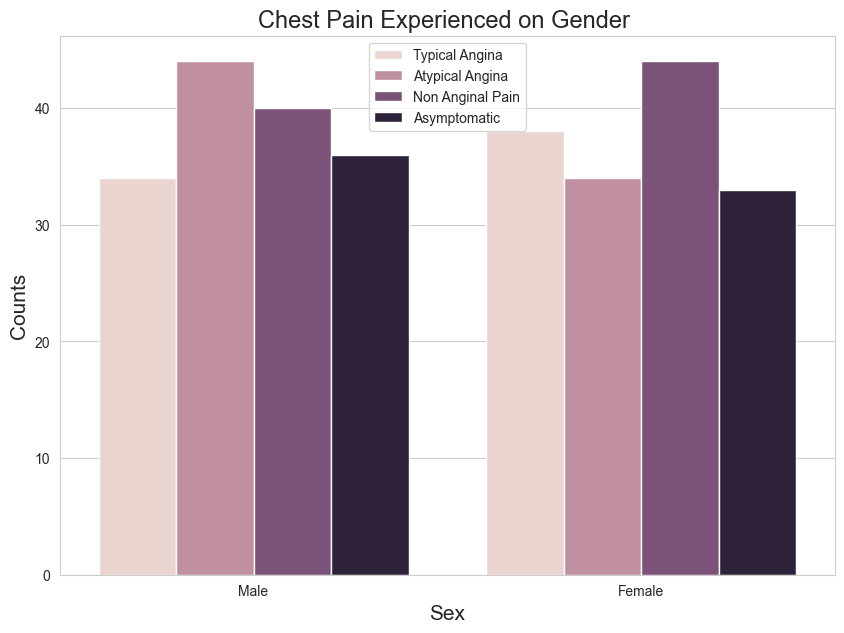

In [23]:
#Count Plot Chest  pain based on gender 
plt.figure(figsize=(10,7))
sns.countplot(x='New_sex',hue='cp',data=df,order=['Male','Female'])
plt.title('Chest Pain Experienced on Gender ',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.show()

We can see that higher number of men are suffering from Atypical Angina and Female are Suffering from Non Anginal pain 

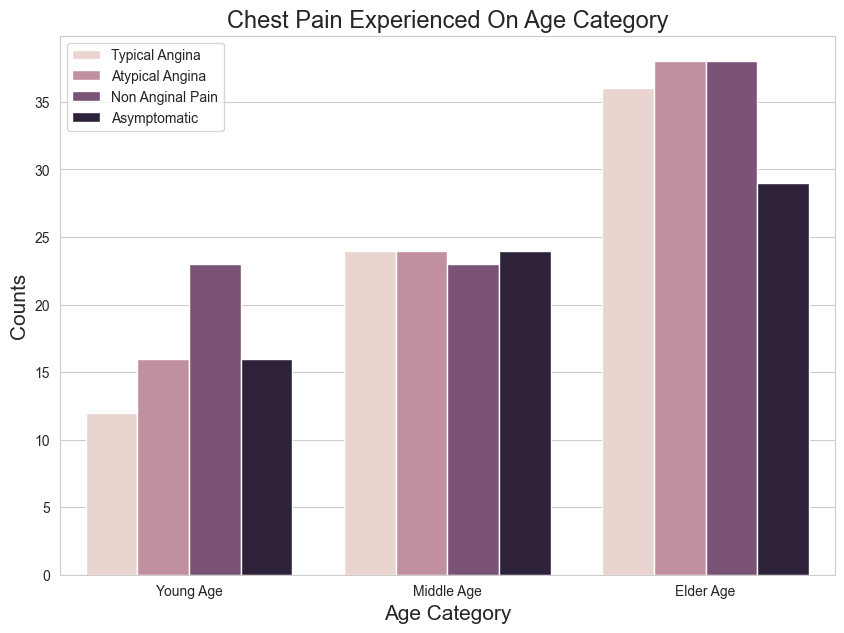

In [24]:
# Cout plot chest pain based on Age category 
plt.figure(figsize=(10,7))
sns.countplot(x='Age_Range',hue='cp',data=df,order=['Young Age','Middle Age','Elder Age'])
plt.title('Chest Pain Experienced On Age Category',fontsize=17)
plt.xlabel('Age Category',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.legend(labels=['Typical Angina','Atypical Angina','Non Anginal Pain','Asymptomatic'])
plt.show()

Elder Age people are suffering from most of the sysmtoms of chest pain very high in Atypical Angina and Non Anginal Pain 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\527484399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='New_sex',y='trestbps',data=df,palette='plasma')


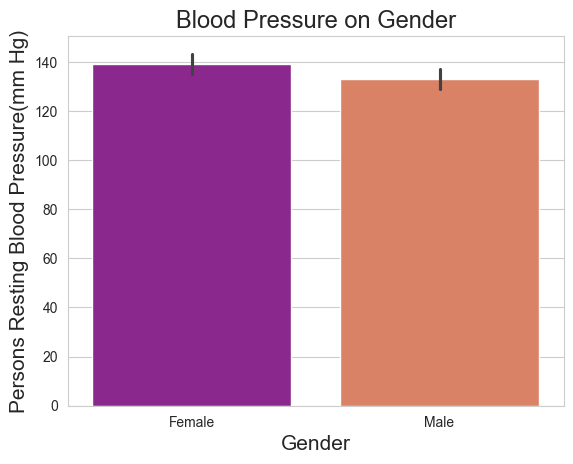

In [25]:
# Bar Plot for the Blood Pressure in Gender 

sns.barplot(x='New_sex',y='trestbps',data=df,palette='plasma')
plt.title('Blood Pressure on Gender',fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Persons Resting Blood Pressure(mm Hg)',fontsize=15)
plt.show()

Blood pressure is slightly higher in Females 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\4000647757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease',y='trestbps',data=df,palette='tab20b_r')


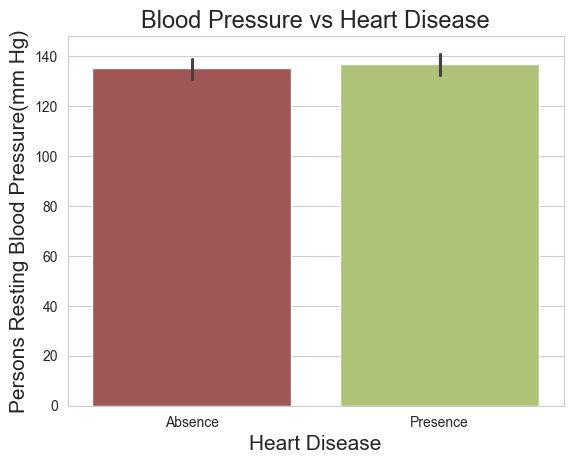

In [26]:
# Barplot Blood Pressure on Heart Disease 
sns.barplot(x='Heart_Disease',y='trestbps',data=df,palette='tab20b_r')
plt.title('Blood Pressure vs Heart Disease',fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Persons Resting Blood Pressure(mm Hg)',fontsize=15)
plt.show()

High Blood Pressure increase the chances of heart disease 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\2453792330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='New_sex',y='chol',data=df,palette='turbo')


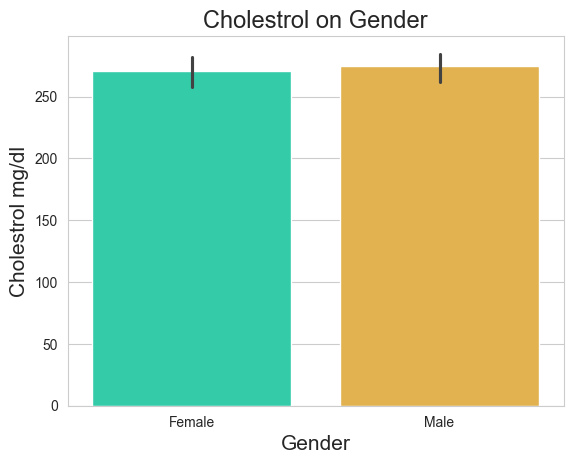

In [27]:
# Barplot Cholestrol level on gender
sns.barplot(x='New_sex',y='chol',data=df,palette='turbo')
plt.title('Cholestrol on Gender',fontsize=17)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Cholestrol mg/dl',fontsize=15)
plt.show()

Male have little bit of higher cholestrol than female.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\4258391315.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease',y='chol',data=df,palette='ocean_r')


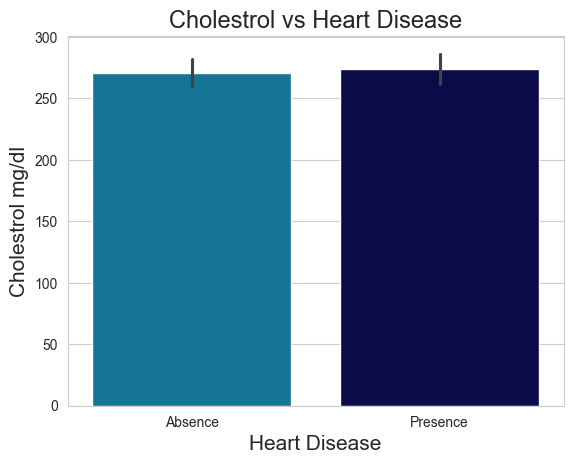

In [28]:
# Barplot Cholestrol on Heart Disease 
sns.barplot(x='Heart_Disease',y='chol',data=df,palette='ocean_r')
plt.title('Cholestrol vs Heart Disease',fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Cholestrol mg/dl',fontsize=15)
plt.show()

Cholestrol level is high in heart  disease increase the Chances of heart disease .

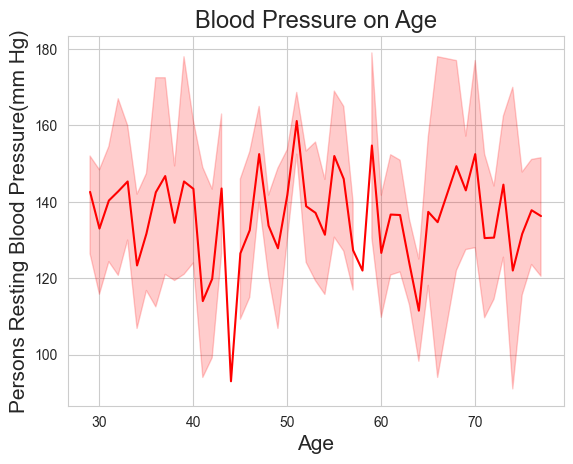

In [34]:
# lineplot of blood pressure on age 
sns.lineplot(x='age',y='trestbps',data=df,color='r')
plt.title('Blood Pressure on Age',fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Persons Resting Blood Pressure(mm Hg)',fontsize=15)
plt.show()

we can see that Blood pressure increase between the age range of 50-60 then again continue the same pattern till the age of 70.

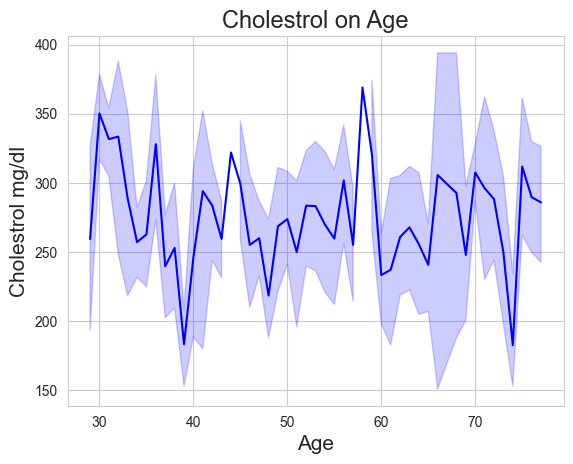

In [35]:
#lineplot Cholestrol on Age
sns.lineplot(x='age',y='chol',data=df,color='b')
plt.title('Cholestrol on Age',fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Cholestrol mg/dl',fontsize=15)
plt.show()

we can see that  cholestrol level is also increase with  respect to the 50-60 age range and then continue the same pattern .

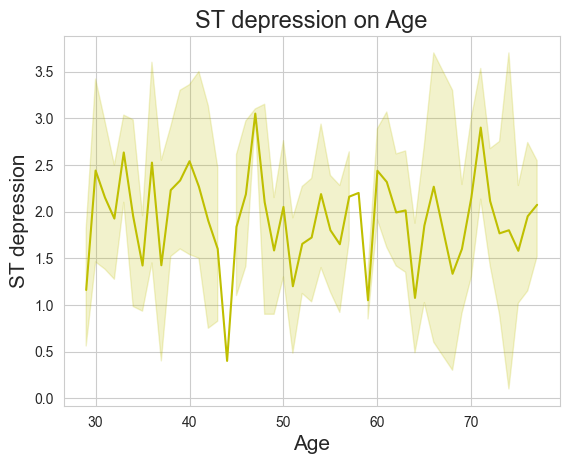

In [36]:
#lineplot ST depression  on Age
sns.lineplot(x='age',y='oldpeak',data=df,color='y')
plt.title('ST depression on Age',fontsize=17)
plt.xlabel('Age',fontsize=15)
plt.ylabel('ST depression',fontsize=15)
plt.show()

we can see that ST depression is increase between the age range of 45-50 and continue the same pattern till 70

ST depression refers to a finding on an electrocardiogram, where in the trace in the ST segment is abnormally low below the baseline

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\2405748841.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='New_sex',y='oldpeak',data=df,palette='tab20b_r')


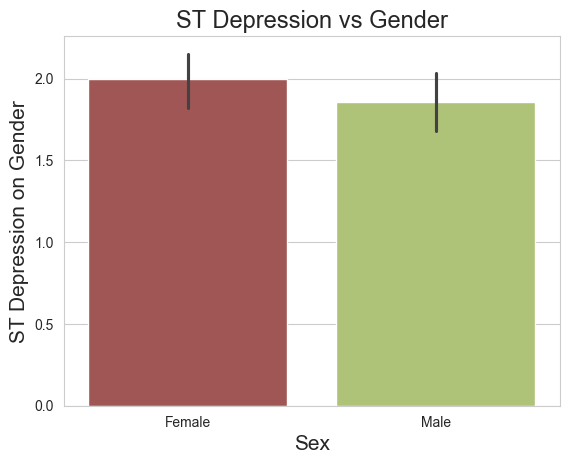

In [39]:
# Barplot ST depression on Heart disease 
sns.barplot(x='New_sex',y='oldpeak',data=df,palette='tab20b_r')
plt.title('ST Depression vs Gender',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('ST Depression on Gender',fontsize=15)
plt.show()

Females are more prone to ST Depression as compared to Male.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\820979228.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Heart_Disease',y='exang',data=df,palette='viridis')


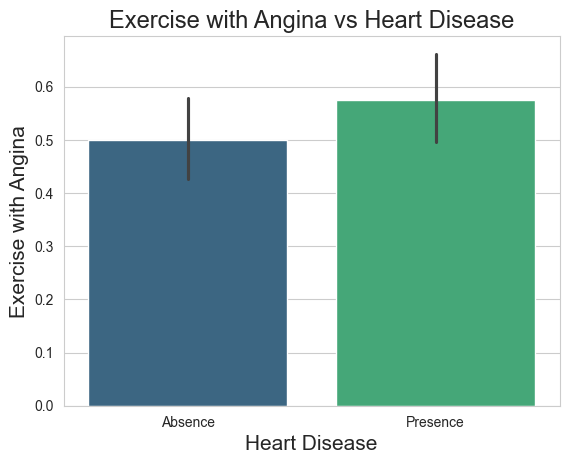

In [41]:
# Barplot Exercise with Angina on Heart Disease 
sns.barplot(x='Heart_Disease',y='exang',data=df,palette='viridis')
plt.title('Exercise with Angina vs Heart Disease',fontsize=17)
plt.xlabel('Heart Disease',fontsize=15)
plt.ylabel('Exercise with Angina',fontsize=15)
plt.show()

If your are suffering from Heart Disease exerice with Angina will make your symptoms worse.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\2732562794.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='New_sex',y='exang',data=df,palette='viridis')


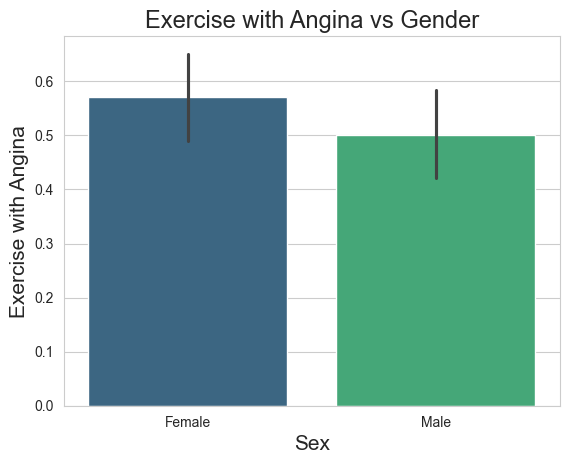

In [42]:
# Barplot Exercise with Angina on Gender 
sns.barplot(x='New_sex',y='exang',data=df,palette='viridis')
plt.title('Exercise with Angina vs Gender',fontsize=17)
plt.xlabel('Sex',fontsize=15)
plt.ylabel('Exercise with Angina',fontsize=15)
plt.show()

Female have have high Exercise Angina

A type of chest pain caused by reduced blood flow to the heart

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18132\2827469392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='fbs', x='New_sex', data=df, palette='hsv')


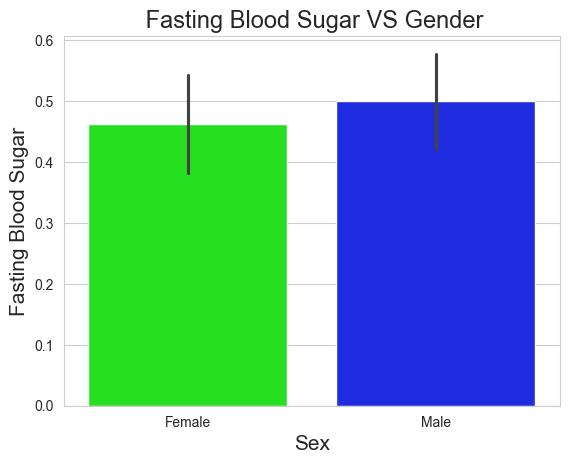

In [45]:
#barplot Fasting Blood sugar on gender 
sns.barplot(y='fbs', x='New_sex', data=df, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

Males have high no of Fasting Blood Sugar over 120

In [47]:
# saving the dataframe
df.to_csv(r'C:\\Users\\LENOVO\\Downloads\\Heart_Disease.csv')